# Deep RNN

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential([
    SimpleRNN(8, input_shape=(2,10), return_sequences=True), # 각 timestep별 보라색 내용들을 따로뽑아줌 
                                                             # False면 보라색부분이 없어서 에러남ㄴ
    # 뉴런은8개 timesteps 2(얘는 parameter개수에 영향X) 10dim
    SimpleRNN(4)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2, 8)              152       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 4)                 52        
                                                                 
Total params: 204
Trainable params: 204
Non-trainable params: 0
_________________________________________________________________


return seuquences 보라색 부분

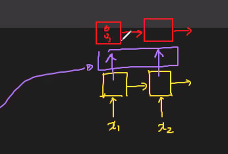

# 가중치 왜 52개?

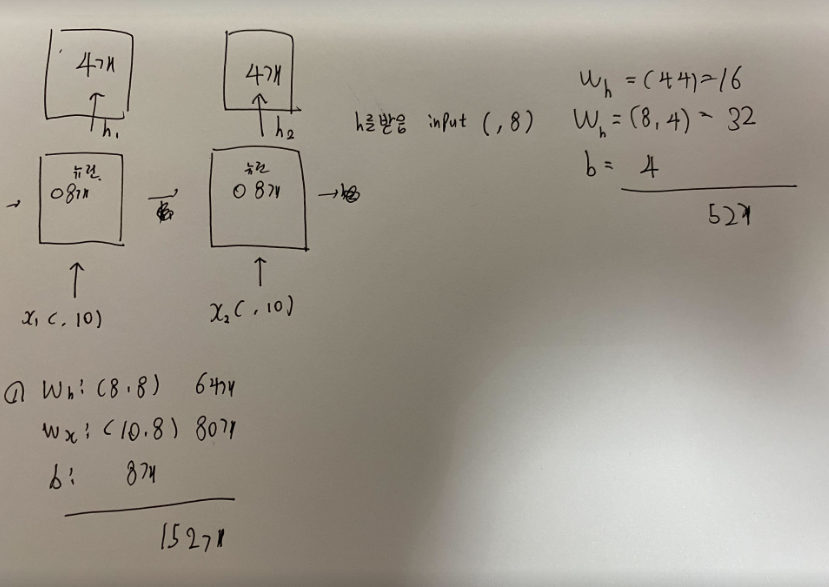


# 양방향 RNN(Bidirectional RNN)


In [4]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Bidirectional( SimpleRNN(8, return_sequences=True), input_shape=(2,10) )
])

model.summary()

# 뒤쪽에서도오기때문에 parameter X 2개

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 2, 16)            304       
 l)                                                              
                                                                 
Total params: 304
Trainable params: 304
Non-trainable params: 0
_________________________________________________________________


# 깊은 양방향 RNN( Deep Bidirectional RNN)


In [5]:

model = Sequential([
    Bidirectional( SimpleRNN(8, return_sequences=True), input_shape=(2,10) ),
    Bidirectional( SimpleRNN(4, return_sequences=True))
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 2, 16)            304       
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 2, 8)             168       
 nal)                                                            
                                                                 
Total params: 472
Trainable params: 472
Non-trainable params: 0
_________________________________________________________________


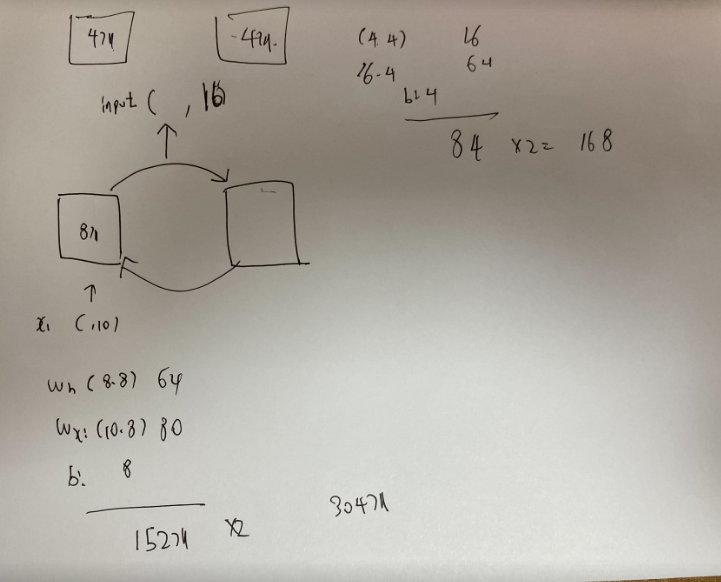

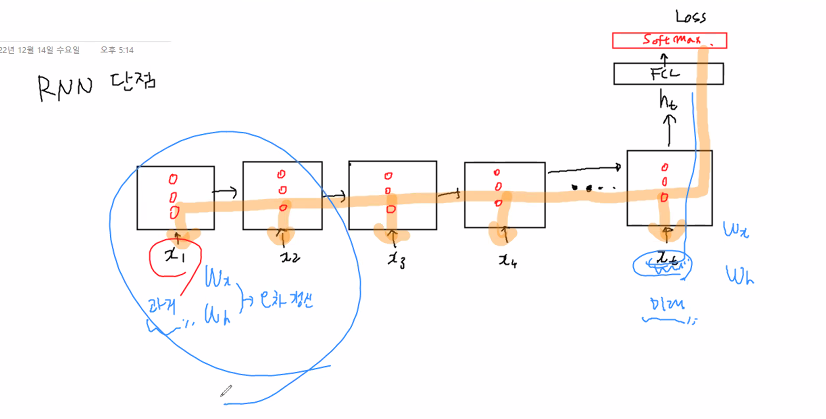

최신 정보만 중요하게 생각한다.⭐
- 거꾸로 오차 역전파 할때에도 이미 미래부분에서 loss개선을 존나해버려서 앞에선 별로 개선이 되지 않는다.
- timestep이 길어지면 과거의 정보는 까먹는 느낌. 잊어먹는다
- gradient vanishing 층을 깊게쌓다보니까 앞쪽은 갱신이 잘안된다.

## gradient vanishing 문제
https://heytech.tistory.com/388

# LSTM Long short term memory
- 앞선 중요한 정보를 오랜시간 기억시키고싶다.⭐⭐
- 장기 기억상태 보존

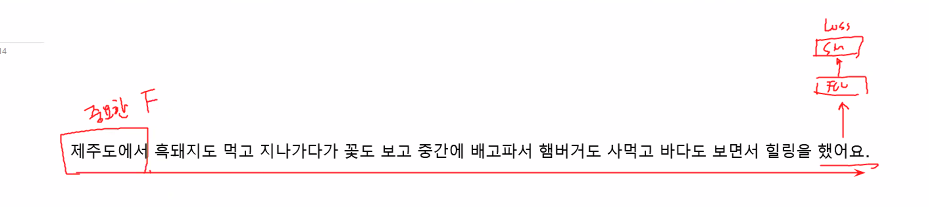

기존 RNN은 했어요가 가장 기억에 남는다.
제주도,
제주도 흑돼지,
제주도 흑돼지 먹고,... 점점 덮어씌우는 느낌이라 앞에껄 잊어버린다 점차.

뭐가 중요한 정보인지 모른다

그럼 제주도 기억하려면?

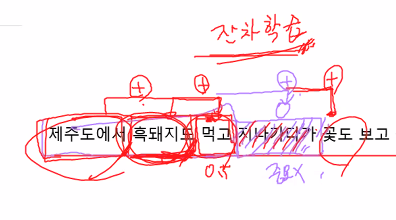

중요하지 않은 정보는 버리고 중요한 구조만 기억할거!

- 시간이 흘러도 중요한 정보 기억 가능하다

### RNN은 관련 정보와 그 정보를 사용하는 지점 사이 거리가 멀 경우 역전파시 그래디언트가 점차 줄어 학습능력이 크게 저하되는 것으로 알려져 있습니다. 이를 vanishing gradient problem이라고 합니다.

이 문제를 극복하기 위해서 고안된 것이 바로 LSTM입니다. LSTM은 RNN의 히든 state에 cell-state를 추가한 구조입니다. 

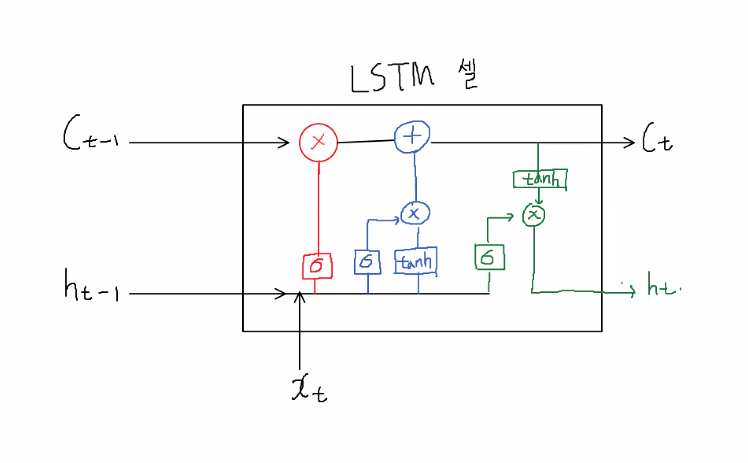

# Cell State

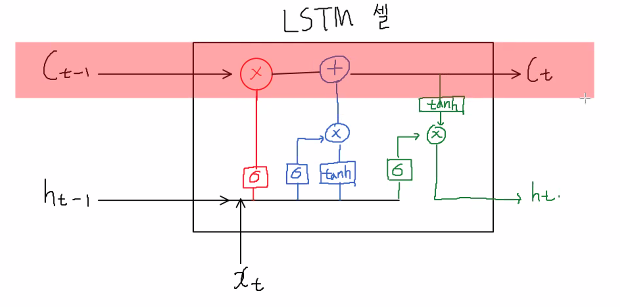

복잡하게 계산한 뭔가 더한다! Residual
- https://phil-baek.tistory.com/entry/ResNet-Deep-Residual-Learning-for-Image-Recognition-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0

resnet에서썼던 residual잔차개념

- 현재 입력상태가 더해짐. $x_t$

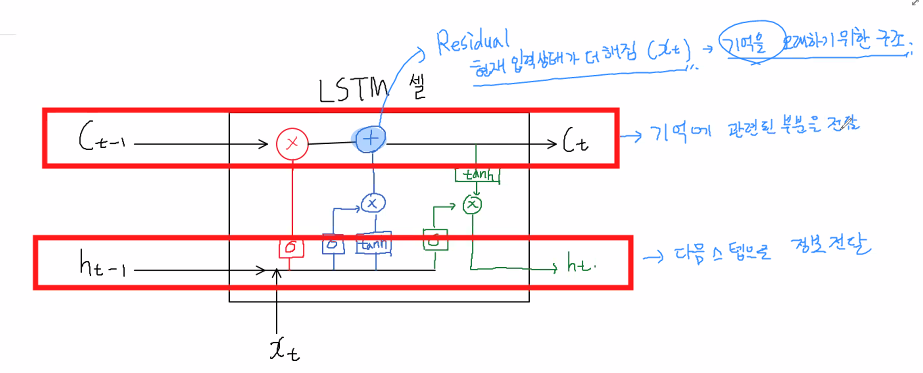

# 💓 forget Gate : 이전상태를 얼마나 기억할지, 잊어버릴지 $C_{t-1}$을 💓


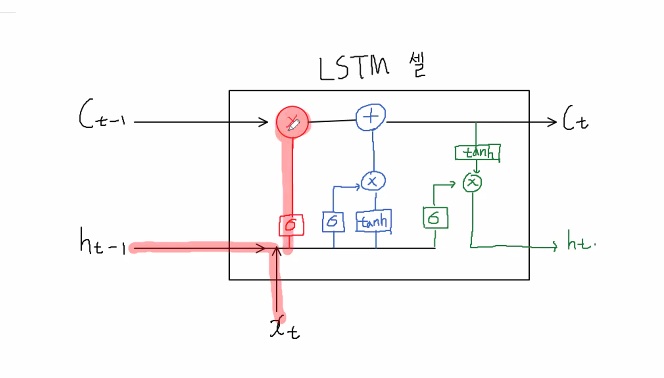

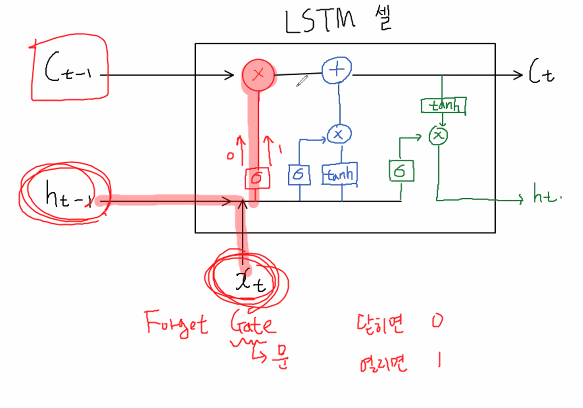

시그모이드의 결과값이 0 이면 잊어버리겠다
- 1에 가까우면 기억하겠다!

- 즉 얼마나 잊을지를 결정해줌

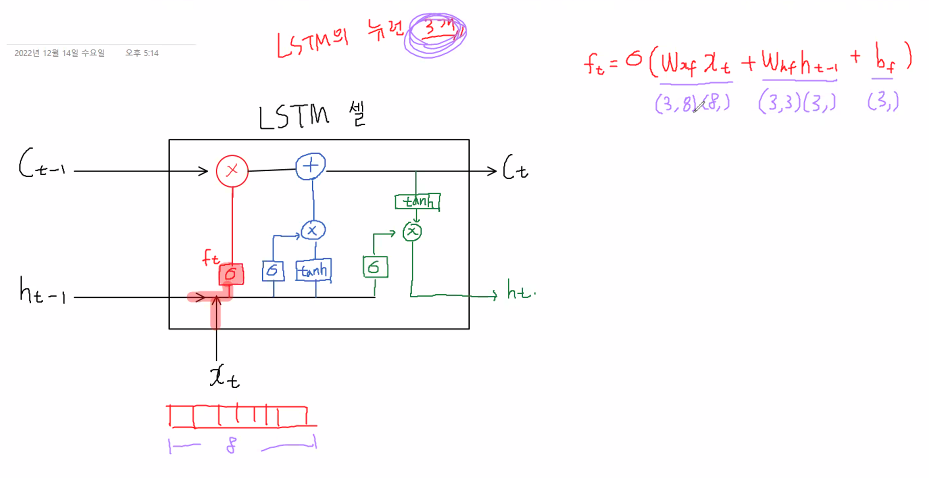

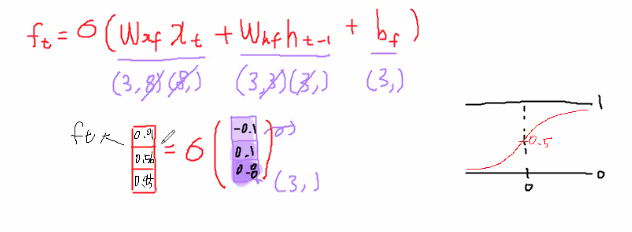

- 첫번째 뉴런에 대한 결과 0.01은 많이 잊어버릴거고
- 두세번째 뉴런에 대한 결과 0.56, 0.95는 많이 기억할거다!

# 💜 Input Gate : cell state에 h(현재상태정보)를 얼마나 사용할지 💜

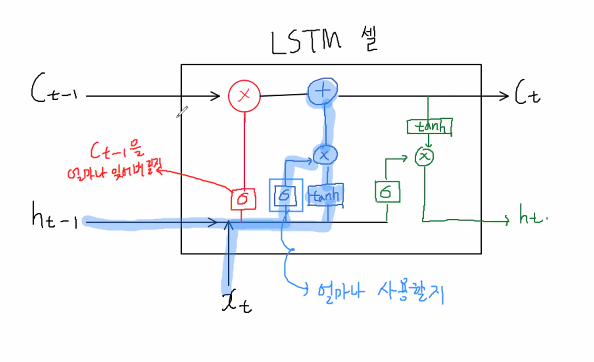

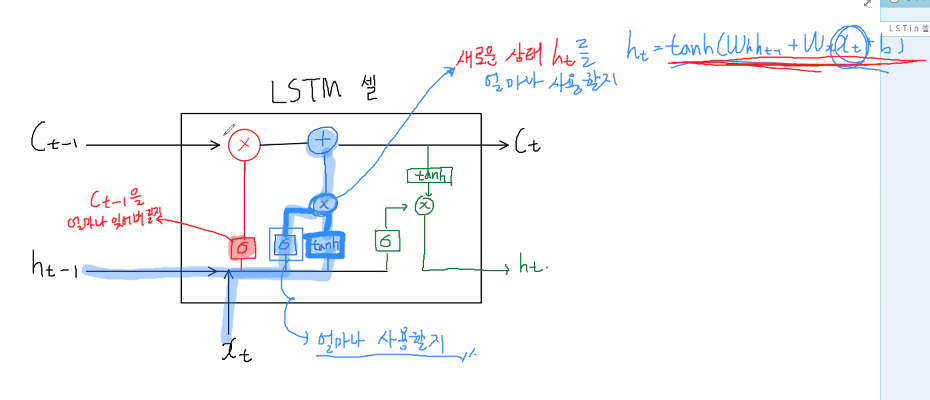

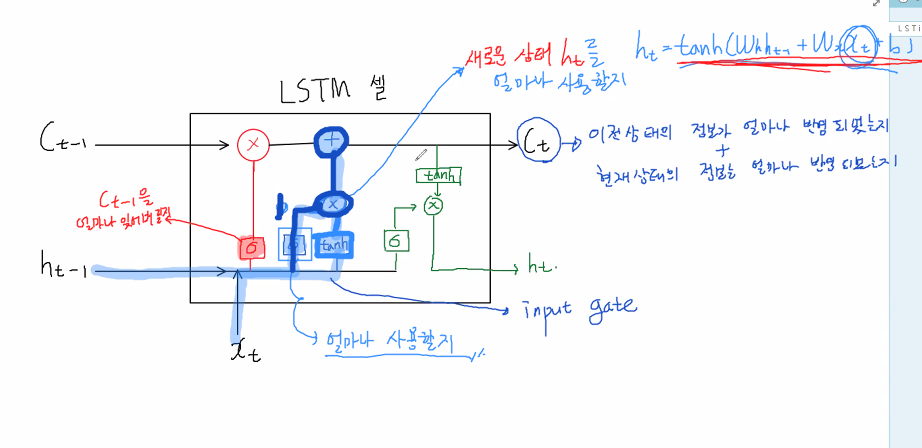

forget gate는 '이전기억'을 얼마나 잊어버릴지 기억할지,

input gate는 현재상태를 얼마나 반영할건지

ex) 이전상태정보 = 1 현재상태정보 = 0 이면
과거정보만 중요하고 현재정보는 하나도 중요하지않다.

ex) 둘다 1이면 둘다 중요하니 이전기억+ 현재기억 추가

ex) 이전상태정보 = 0 현재상태정보 = 1 이면
과거기억은 다 버려라 현재정보가 중요하다

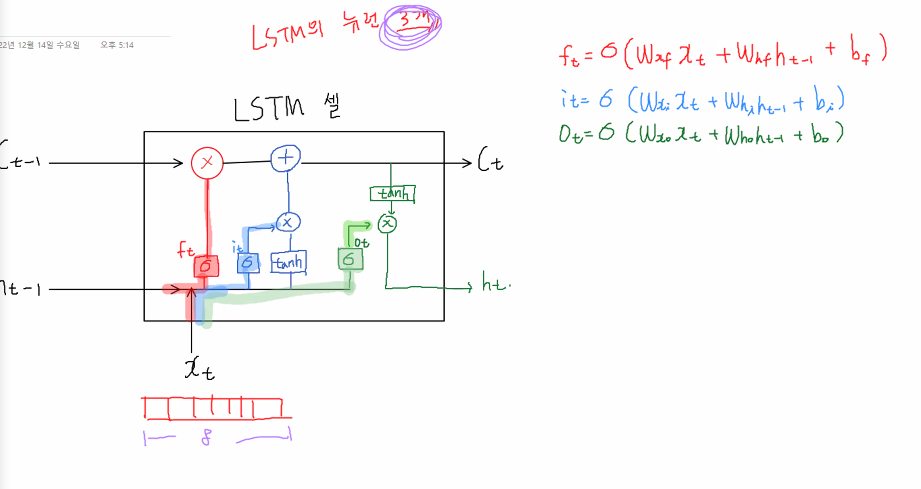

# 💚 Output Gate 💚

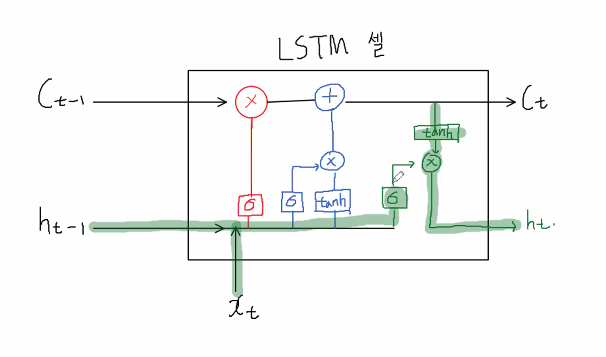

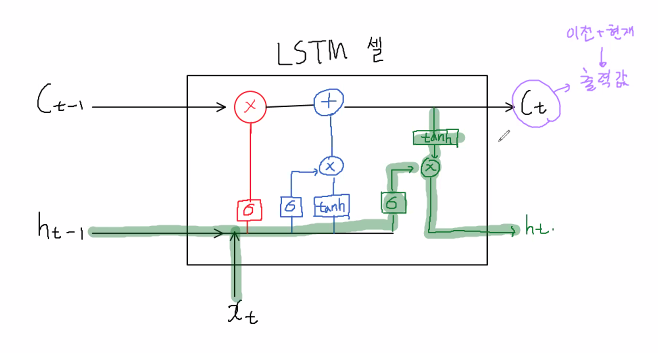

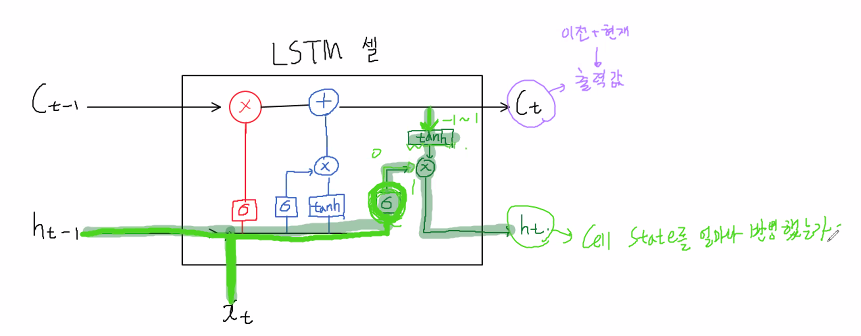

Cell state 의 어느부분을 내보낼 것인가

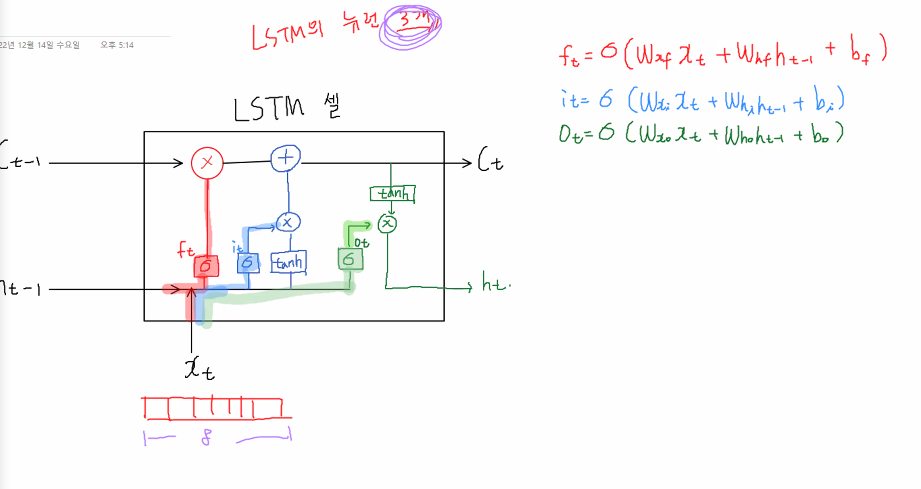

# 최종 정리

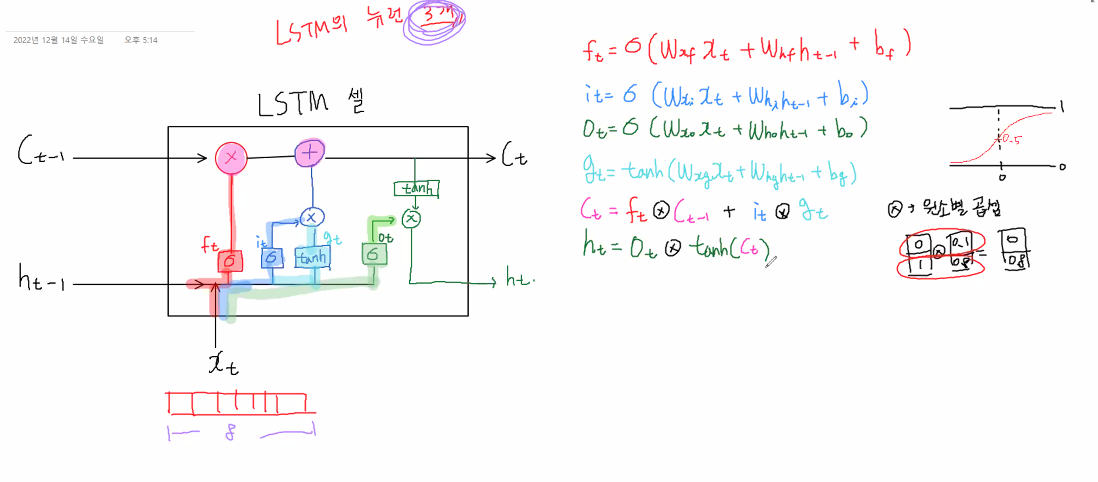